In [1]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [3]:
from keras.datasets import imdb
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [4]:
train_data[0]# пример отзыва. Цифра - номер слова. Всего используеться словарь из 1000 слов

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [12]:
len(train_labels)

25000

In [5]:

max([max(sequence) for sequence in train_data])

9999

In [9]:

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [10]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))#Создаем нулевую матрицу
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Заполняем 1 элемент единицей
    return results


x_train = vectorize_sequences(train_data)
#векторизация
x_test = vectorize_sequences(test_data)

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [17]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [18]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc','accuracy'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.0038 - acc: 0.9989 - accuracy: 0.9989 - val_loss: 0.5044 - val_acc: 0.9061 - val_accuracy: 0.9061
Epoch 2/20
15000/15000 [==============================] - 2s 140us/step - loss: 2.1741e-04 - acc: 1.0000 - accuracy: 1.0000 - val_loss: 0.5174 - val_acc: 0.9064 - val_accuracy: 0.9064
Epoch 3/20
15000/15000 [==============================] - 2s 132us/step - loss: 1.5124e-04 - acc: 1.0000 - accuracy: 1.0000 - val_loss: 0.5399 - val_acc: 0.9054 - val_accuracy: 0.9054
Epoch 4/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.0017 - acc: 0.9995 - accuracy: 0.9995 - val_loss: 0.5613 - val_acc: 0.9047 - val_accuracy: 0.9047
Epoch 5/20
15000/15000 [==============================] - 2s 131us/step - loss: 8.2878e-05 - acc: 1.0000 - accuracy: 1.0000 - val_loss: 0.5757 - val_acc: 0.9037 - val_accuracy: 0.9037
Epoch 6/20
15000/15000 [==============

In [37]:
results

[1.4144779797071219, 0.8449599742889404, 0.8449599742889404]

In [21]:
history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

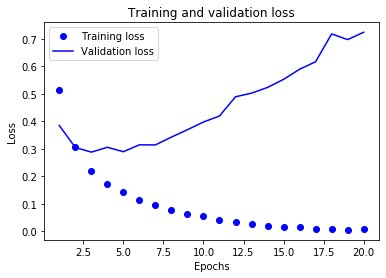

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Потери на этапе обучения')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Потери на этапе проверки')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

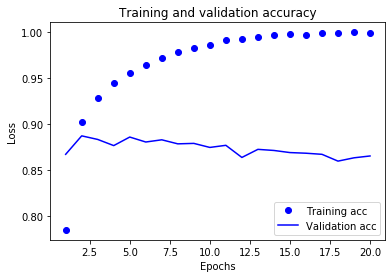

In [25]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [50]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=1014)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.1697 - accuracy: 0.7729
Epoch 2/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.0922 - accuracy: 0.8949
Epoch 3/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.0657 - accuracy: 0.9226
Epoch 4/4
25000/25000 [==============================] - 2s 91us/step


In [49]:
results

[0.3518430491733551, 0.861240029335022]